In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

In [ ]:
tokenizer = Tokenizer()

# data = open('/tmp/irish-lyrics-eof.txt').read()
data = open("/content/songs.txt").read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'you': 2, 'the': 3, 'and': 4, 'me': 5, 'to': 6, 'it': 7, 'my': 8, 'love': 9, 'in': 10, 'a': 11, 'we': 12, 'now': 13, 'your': 14, 'on': 15, 'oh': 16, 'be': 17, 'if': 18, 'that': 19, 'all': 20, 'like': 21, 'out': 22, 'know': 23, 'is': 24, 'but': 25, 'just': 26, 'so': 27, 'for': 28, 'when': 29, 'will': 30, "it's": 31, "i'm": 32, 'was': 33, 'with': 34, 'baby': 35, "don't": 36, 'never': 37, 'see': 38, 'this': 39, 'up': 40, "you're": 41, 'of': 42, 'here': 43, 'got': 44, 'are': 45, 'no': 46, 'good': 47, 'not': 48, 'mind': 49, 'let': 50, 'want': 51, "i'll": 52, 'ooh': 53, 'night': 54, 'go': 55, 'one': 56, 'do': 57, 'said': 58, 'way': 59, "won't": 60, 'daddy': 61, 'time': 62, 'have': 63, 'can': 64, 'her': 65, 'fire': 66, 'hold': 67, 'friends': 68, 'darling': 69, 'yo': 70, 'give': 71, "can't": 72, 'again': 73, 'down': 74, 'get': 75, 'yeah': 76, 'say': 77, 'lead': 78, 'only': 79, 'miss': 80, 'could': 81, 'how': 82, "'cause": 83, 'take': 84, 'tonight': 85, 'life': 86, 'mine': 87, 'keep': 

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [ ]:
print(tokenizer.word_index['oh'])
print(tokenizer.word_index['baby'])
# print(tokenizer.word_index['town'])
# print(tokenizer.word_index['of'])
# print(tokenizer.word_index['athy'])
# print(tokenizer.word_index['one'])
# print(tokenizer.word_index['jeremy'])
# print(tokenizer.word_index['lanigan'])

16
35


In [ ]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0   0  82  33   1 473   6]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  82  33   1 473]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'i': 1, 'you': 2, 'the': 3, 'and': 4, 'me': 5, 'to': 6, 'it': 7, 'my': 8, 'love': 9, 'in': 10, 'a': 11, 'we': 12, 'now': 13, 'your': 14, 'on': 15, 'oh': 16, 'be': 17, 'if': 18, 'that': 19, 'all': 20, 'like': 21, 'out': 22, 'know': 23, 'is': 24, 'but': 25, 'just': 26, 'so': 27, 'for': 28, 'when': 29, 'will': 30, "it's": 31, "i'm": 32, 'was': 33, 'with': 34, 'baby': 35, "don't": 36, 'never': 37, 'see': 38, 'this': 39, 'up': 40, "you're": 41, 'of': 42, 'here': 43, 'got': 44, 'are': 45, 'no': 46, 'good': 47, 'not': 48, 'mind': 49, 'let': 50, 'want': 51, "i'll": 52, 'ooh': 53, 'night': 54, 'go': 55, 'one': 56, 'do': 57, 'said': 58, 'way': 59, "won't": 60, 'daddy': 61, 'time': 62, 'have': 63, 'can': 64, 'her': 65, 'fire': 66, 'hold': 67, 'friends': 68, 'darling': 69, 'yo': 70, 'give': 71, "can't": 72, 'again': 73, 'down': 74, 'get': 75, 'yeah': 76, 'say': 77, 'lead': 78, 'only': 79, 'miss': 80, 'could': 81, 'how': 82, "'cause": 83, 'take': 84, 'tonight': 85, 'life': 86, 'mine': 87, 'keep': 

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
211/211 [==============================] - 12s 20ms/step - loss: 5.8043 - accuracy: 0.0604
Epoch 2/100
211/211 [==============================] - 4s 19ms/step - loss: 4.2270 - accuracy: 0.2415
Epoch 3/100
211/211 [==============================] - 4s 18ms/step - loss: 2.8725 - accuracy: 0.4125
Epoch 4/100
211/211 [==============================] - 4s 18ms/step - loss: 1.9630 - accuracy: 0.5465
Epoch 5/100
211/211 [==============================] - 4s 19ms/step - loss: 1.4343 - accuracy: 0.6583
Epoch 6/100
211/211 [==============================] - 4s 19ms/step - loss: 1.0482 - accuracy: 0.7459
Epoch 7/100
211/211 [==============================] - 4s 19ms/step - loss: 0.8389 - accuracy: 0.7976
Epoch 8/100
211/211 [==============================] - 4s 18ms/step - loss: 0.7265 - accuracy: 0.8153
Epoch 9/100
211/211 [==============================] - 4s 19ms/step - loss: 0.6654 - accuracy: 0.8277
Epoch 10/100
211/211 [==============================] - 4s 19ms/step - loss: 0.62

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

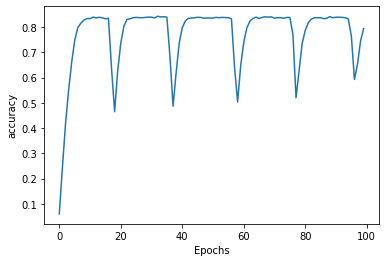

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
# seed_text = "I've got a bad feeling about this"
seed_text = "Last time I met her was last summer"
next_words = 150
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Last time I met her was last summer it's true it's true it's true it's true have friends nor not thrown up in so long babe of us at just try to keep those secrets in before getting used the side high i'll cook and sew raised them whole right heard again now i've lived last night away out tonight last through the night fields in so long in hazel golden and it's true for said my you next to me yeah this you exactly or true i know know we're oh because so only oh i did it wrong or we're losing six shone up there and red he losing dreamed touch and my leg but role smoking handrolled cigarettes wings won’t he changing air all his red she stare won’t all city lights and broken black card bed teen full of life city i'd hell yes his animal anyway with by eve mistakes own means ground


In [ ]:
Last time I met her was last summer 
it's true it's true 
it's true it's true 
have friends nor not thrown up 
in so long babe of us 
at just try to keep those secrets 
in before getting used the side high 
i'll cook and sew raised them 
whole right heard again 
now i've lived last night away 
out tonight last through the night fields 
in so long in hazel golden and it's true 
for said my you next to me yeah this you exactly or true 
i know know we're oh because so only oh i did it wrong 
or we're losing six shone up there and red he losing 
dreamed touch and my leg but role 
smoking handrolled cigarettes wings 
won’t he changing air all his red 
she stare won’t all city lights 
and broken black card bed teen 
full of life city i'd hell yes 
his animal anyway with by eve mistakes own means ground